### Imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import util

sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

### Load data

In [2]:
df, df_shops, df_ingredients = util.load_burritos()
df.tail()

,Location,Burrito,Date,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,...,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes
368,tony's fresh mexican food,la paz,5/22/2018,9.99,5.0,NaN,NaN,20.0,22.0,0.77,...,3.0,5.0,3.5,NaN,3.0,4.5,4.0,NaN,hannah,NaN
369,tony's fresh mexican food,la paz,5/22/2018,9.99,4.0,NaN,NaN,20.0,22.0,0.77,...,3.0,4.0,4.0,2.0,4.0,3.0,4.0,NaN,mike,NaN
370,tony's fresh mexican food,adobada,5/22/2018,7.39,4.0,NaN,NaN,24.0,21.0,0.84,...,3.0,4.0,5.0,4.0,4.0,5.0,4.0,NaN,nick g.,NaN
371,tony's fresh mexican food,adobada,5/22/2018,7.39,4.5,NaN,NaN,21.0,22.5,0.85,...,3.5,2.0,1.0,3.5,3.5,4.0,3.5,NaN,ricardo,NaN
372,tony's fresh mexican food,veggie,5/22/2018,7.39,4.0,NaN,NaN,22.0,20.0,0.70,...,3.0,NaN,4.0,NaN,3.0,4.0,3.5,NaN,erin,NaN


# Compare burrito features across restaurants

In [14]:
df_plt.head()

,Location,dim,rating
0,Taco Stand,Tortilla rating,3.0
1,Taco Stand,Temperature rating,2.5
2,Taco Stand,Meat flavor rating,4.0
3,Taco Stand,Overall rating,4.2
4,Taco Stand,Tortilla rating,4.0


Volume, N = 51, p = 0.05372
Tortilla, N = 51, p = 0.22977
Temp, N = 51, p = 0.19568
Meat, N = 51, p = 0.03380
overall, N = 51, p = 0.00004


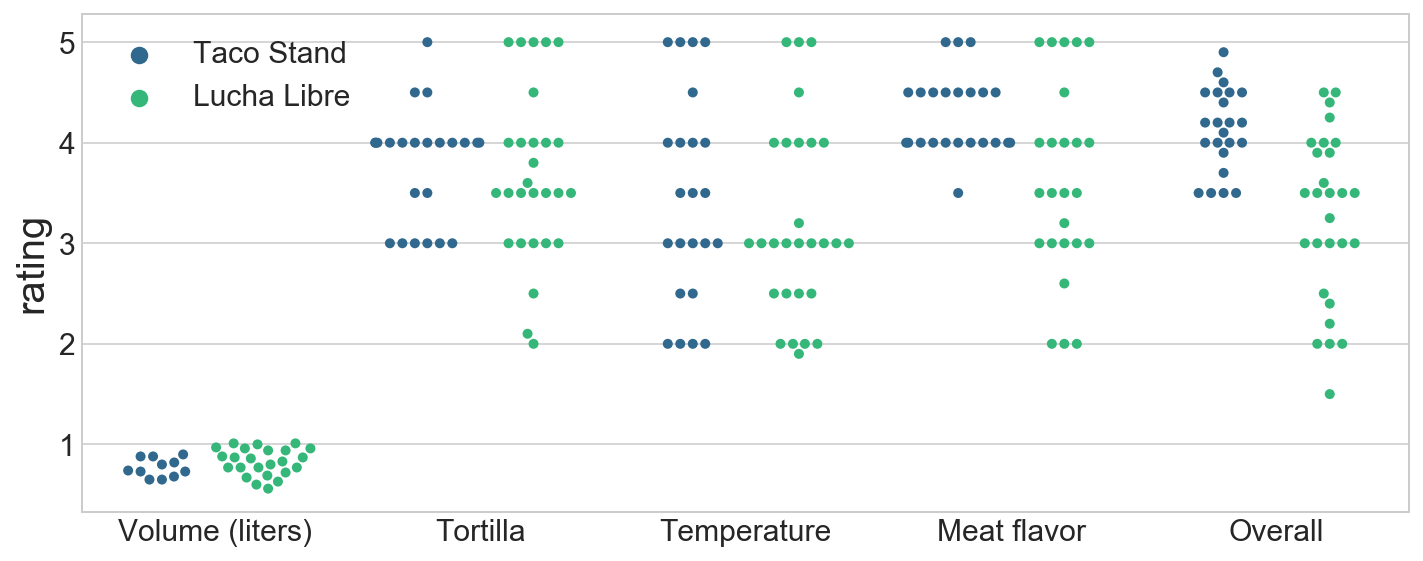

In [38]:
rest_include = ['taco stand', 'lucha libre north park']
rest_names = {'taco stand': 'Taco Stand', 'lucha libre north park': 'Lucha Libre'}
cols_keep = ['Location', 'Volume', 'Tortilla', 'Temp', 'Meat', 'overall']
df_plt = df[df['Location'].isin(rest_include)][cols_keep].copy()
df_plt.replace(rest_names, inplace=True)
df_plt = df_plt.set_index('Location').stack().reset_index().rename({'level_1':'dim', 0:'rating'}, axis=1)
cols_ylabels = {'Volume': 'Volume (liters)',
                'Tortilla': 'Tortilla',
                'Temp': 'Temperature',
                'Meat': 'Meat flavor',
                'overall': 'Overall'}
df_plt.replace(cols_ylabels, inplace=True)

plt.figure(figsize=(10,4))
sns.swarmplot(x='dim', hue='Location', y='rating', data=df_plt, dodge=True, palette = 'viridis',
              order = ['Volume (liters)', 'Tortilla', 'Temperature', 'Meat flavor', 'Overall'])
plt.legend(fontsize=15)
plt.xlabel('')

plt.tight_layout()
plt.savefig('/gh/fig/burrito/tacostand_lucha.png')

# Print stats
for col in cols_ylabels.keys():
    xs_ts = df[df['Location']=='taco stand'][col]
    xs_lucha = df[df['Location']=='lucha libre north park'][col]
    U, p = stats.mannwhitneyu(xs_ts, xs_lucha)
    print('{:s}, N = {:d}, p = {:.5f}'.format(col,len(xs_ts) + len(xs_lucha), p))

In [23]:
sns.swarmplot?